In [13]:
import numpy as np
import matplotlib.pyplot as plt
from sympy import *
from autograd import jacobian
from scipy.integrate import odeint
import math
import sympy
from scipy.optimize import fsolve
from functools import reduce
import scipy.linalg as la

In [14]:
alpha1 = 10
alpha2 = 10
beta = 2
gamma = 2
params = [alpha1,alpha2,beta,gamma]

In [15]:
def getSteadyPoints(params):
    '''This Function takes in the parameters for the Toggle Switch Model and returns a list of steady points.
    
    First the TS equations are defined. Then for a range of initial guesses, the fixed points are computed 
    using fsovle. These are stored in a list that is then converted to set to remove all duplicate values. 
    The set is then converted back to list and returned.                                               '''
    
    # Unpacking the params list.
    alpha1 = params[0]
    alpha2 = params[1]
    beta = params[2]
    gamma = params[3]
    
    # Defining the TS equations for use with fsolve
    def equations(p):
        U ,V = p
        return (((alpha1/(1+V**beta))-U), ((alpha2/(1+U**gamma))-V))

    # Using fsolve with a range of initial conditions to get steady points.
    sp=[]
    for n in range(0,10):
        for i in range(0,10):
            sol, info, ier, msg = fsolve(equations, [n,i], full_output=True)
            if (ier == 1):
                temp = tuple(np.round(sol,4))
                sp.append(temp)
        

    # Removing all duplicates by creating a set. 
    sp_set = set(sp)
    sp_list = list(sp_set)
    return sp_list

In [16]:
def getEigenvalues(steadypoints,params):
    '''This Function takes the steady points and parameters, and returns an array of eigenvalues correspoinding
    to the eigenvalues at each of the steady points
    
    The Jacobian Matrix is defined. For each steady point the eigenvalues and eigenvectors are computed, 
    and the eigenvalues are appended to a list that is returned. 
                                                                                                        '''
    alpha1 = params[0]
    alpha2 = params[1]
    beta = params[2]
    gamma = params[3]
    no_steadyp = len(steadypoints)
    
    
    # Defining Jacobian Matrix
    def Jacobian(U,V,alpha1,alpha2,beta,gamma):
        return ([-1,(-1*alpha1*beta*(V**(beta-1)))/((1+(V**beta))**2)],[(-1*alpha2*gamma*(U**(gamma-1)))/((1+(U**gamma))**2),-1])
    Usp = []
    Vsp = []
    EV_list = []
    for i in range (0,no_steadyp):
        x_s,y_s = steadypoints[i]
        Usp.append(x_s)
        Vsp.append(y_s)
        J1 = np.array(Jacobian(Usp[i],Vsp[i],alpha1,alpha2,beta,gamma))
        eigVals,eigvecs = la.eig(J1)
        EV_list.append(eigVals)

    return EV_list
    

c:\program files\python36\lib\site-packages\ipykernel_launcher.py:20: RuntimeWarning: divide by zero encountered in true_divide
c:\program files\python36\lib\site-packages\ipykernel_launcher.py:20: RuntimeWarning: invalid value encountered in sqrt
c:\program files\python36\lib\site-packages\ipykernel_launcher.py:30: RuntimeWarning: divide by zero encountered in true_divide
c:\program files\python36\lib\site-packages\ipykernel_launcher.py:30: RuntimeWarning: invalid value encountered in sqrt


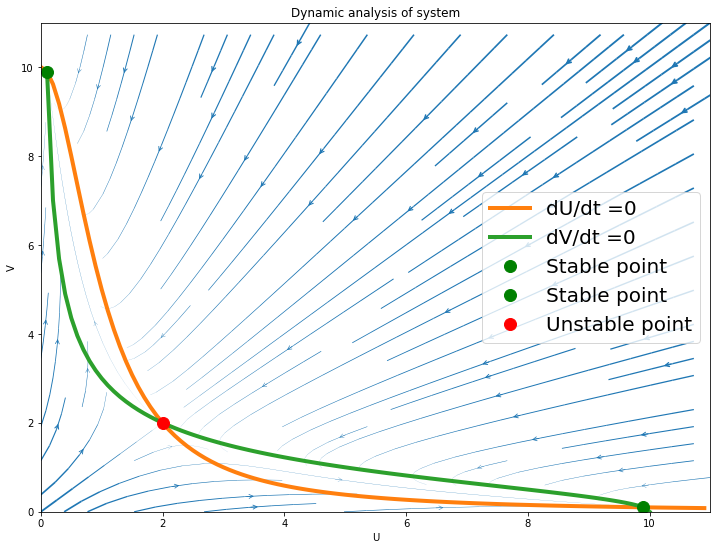

In [17]:
fig=plt.figure(figsize=(12,9))

# Plotting streamlines

Y, X = np.mgrid[0:alpha1*1.1:100j, 0:alpha2*1.1:100j]

U2 = (alpha1/(Y**beta+1) - X)
V2 = (alpha2/(X**gamma+1) - Y)

speed = np.sqrt(U2*U2 + V2*V2)
q = 2*speed / speed.max()

plt.streamplot(X, Y, U2, V2, density=1, arrowstyle = '->', linewidth = q)

# Plotting the Nullclines

x = np.arange(0.0, alpha1*1.1, 0.1)

Nullcline1 = alpha1/(1+x**beta)
Nullcline2 = ((alpha2/x)-1)**(1./gamma)

plt.plot(x, Nullcline1, label='dU/dt = 0', linewidth=4)
plt.plot(x, Nullcline2, label='dV/dt = 0', linewidth=4)
plt.xlabel('U')
plt.ylabel('V')
plt.title('Dynamic analysis of system')


Nullcline1 = alpha1/(1+x**beta)
Nullcline2 = ((alpha2/x)-1)**(1./gamma)

steady_points = getSteadyPoints(params)

stablex = [] # arrays in which stable and unstable fixed point values will be stored
stabley = []
unstablex = []
unstabley = []    

eigvals = getEigenvalues(steady_points,params)

for i in range(0,len(steady_points)):
    if (eigvals[i][0]<0 and eigvals[i][1]< 0): 
        stablex.append(steady_points[i][0])
        stabley.append(steady_points[i][1])
    else: # If the eigenvalues are not both negative the fixed point must be unstable
        unstablex.append(steady_points[i][0])
        unstabley.append(steady_points[i][1])

# Stable points are plotted in green
# Unstable points are plotted in red

for i in range(len(stablex)): 
    #plt.plot(stablex[i], stabley[i], "go", label='stable points')
    plt.plot(stablex[i], stabley[i], 'go', markersize=12)

for i in range(len(unstablex)): 
    #plt.plot(unstablex[i], unstabley[i], "ro")
    plt.plot(unstablex[i], unstabley[i], 'ro', markersize=12)
    
plt.legend(('dU/dt =0','dV/dt =0','Stable point', 'Stable point','Unstable point'), fontsize=20, frameon=1)
plt.show()

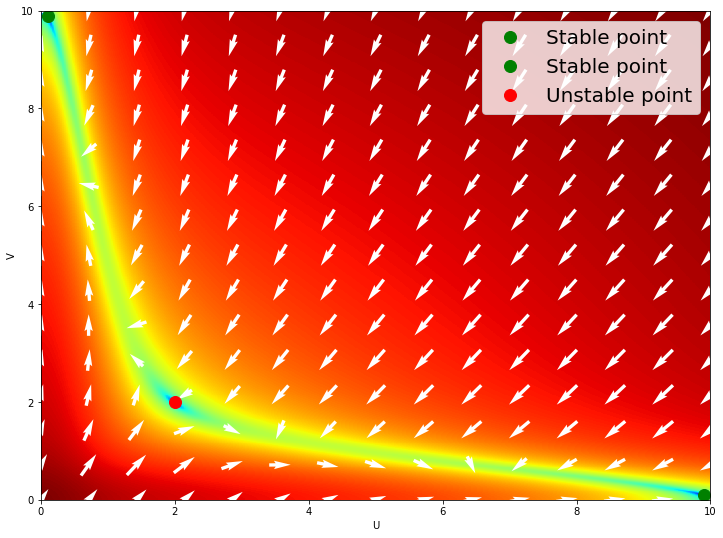

In [18]:
fig=plt.figure(figsize=(12,9))

# Quiver plot
x = np.linspace(0, alpha2, 1000) # Change resoltion if good quality is not needed
y = np.linspace(0, alpha1, 1000)

(X,Y) = np.meshgrid(x,y)

V = (alpha2/(Y**gamma+1) - X)
U = (alpha1/(X**beta+1) - Y)
Magnitude = (U**2 + V**2)**(1/2)

xt = np.linspace(0, alpha2 , 15)
yt = np.linspace(0, alpha1, 15)

(Xt,Yt) = np.meshgrid(xt,yt)

Ut = (alpha2/(Yt**gamma+1) - Xt)
Vt = (alpha1/(Xt**beta+1) - Yt)

Ut = Ut / np.sqrt(Ut**2 + Vt**2) # Normalisation of vectors
Vt = Vt / np.sqrt(Ut**2 + Vt**2)

M2 = np.log10(np.abs(Magnitude))

M = 0.25*(M2[:-1,:-1] + M2[:-1,1:] + M2[1:,:-1] + M2[1:,1:])

plt.jet()
plt.pcolor(x,y, M)
plt.quiver(Xt, Yt, Ut, Vt, color = 'w', pivot='mid', headwidth = 2.5, headlength = 5, width = 0.005) # Trajectory lines
plt.xlabel('U')
plt.ylabel('V')

for i in range(len(stablex)): 
    #plt.plot(stablex[i], stabley[i], "go", label='stable points')
    plt.plot(stablex[i], stabley[i], 'go', markersize=12)

for i in range(len(unstablex)): 
    #plt.plot(unstablex[i], unstabley[i], "ro")
    plt.plot(unstablex[i], unstabley[i], 'ro', markersize=12)

plt.legend(('Stable point', 'Stable point', 'Unstable point'), fontsize=20, frameon=1)
    